### Import Libraries

In [2]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

### Load Audio File

In [6]:
claps_file = "./audio/test.wav"
claps, sr = librosa.load(claps_file)

### Extract Spectrograms

In [9]:
FRAME_SIZE = 2048
HOP_SIZE = 512

claps_spec = librosa.stft(y=claps, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

print(f"Shape: {claps_spec.shape}")

Shape: (1025, 216)


### Calculate Band Energy Ratio

In [14]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / spectrogram.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)


def calculate_band_energy_ratio(spectrogram, split_frequency, sample_rate):
    
    # get the split frequency bin
    split_frequency_bin = calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate)

    # create a variable to store the BER
    band_energy_ratios = []

    # move to the power spectrogram
    power_spec = np.abs(spectrogram) ** 2
    power_spec = power_spec.T

    # loop through each frame and calculate the BER
    for frequencies_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_current_frame = np.divide(sum_power_low_frequencies, sum_power_high_frequencies)
        band_energy_ratios.append(ber_current_frame)

    # return the result
    return np.array(band_energy_ratios)

### Visualise Band Energy Ratio Curves

/tmp/ipykernel_176116/3038807449.py:24: RuntimeWarning: invalid value encountered in divide
  ber_current_frame = np.divide(sum_power_low_frequencies, sum_power_high_frequencies)


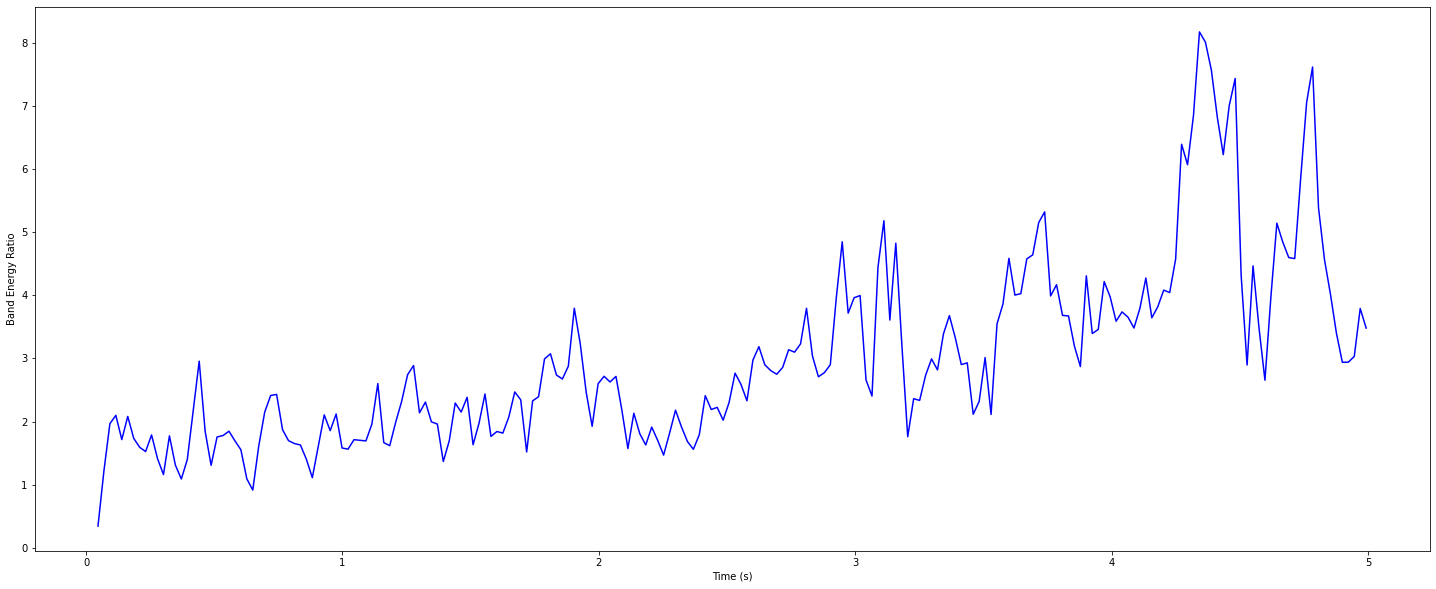

In [18]:
# get the BER ratios
ber_claps = calculate_band_energy_ratio(claps_spec, 2000, sr)

# create a time series for the x-axis
frames = range(len(ber_claps))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

# visualise
plt.figure(figsize=(25, 10))

plt.plot(t, ber_claps, color='b')
plt.xlabel("Time (s)")
plt.ylabel("Band Energy Ratio")
plt.show()